# Modelling spreading of infectious diseases
This is an experimental model made in a few hours. Inspirered by https://triplebyte.com/blog/modeling-infectious-diseases. 

The model is purely for testing the capabilities of ModelFlow 

To run the model select **cell>run all** in the menu 

## Import some stuff

In [2]:
import pandas as pd
from ipywidgets import interact,Dropdown,Checkbox,Layout,FloatSlider

from modelsandbox import newmodel
import modelclass as mc
import modelmanipulation as mp 
from modeljupyter import inputwidget

##  Specify Model
The model is specified as equations. The equations defines the daily transition between the states:

 - susciptible
 - exposed
 - infectious
 - recovered
 - dead 
 
Some conventions:
 - (-1) after a variable means the value the day before.
 - diff means the change in variable from the day before

In [3]:
rcorona = '''\
             infection_rate        = rate_contact * probability_transmision * infectious(-1) / population(-1) 
             new_exposed           = infection_rate * susceptible
             diff(exposed)         = new_exposed - new_infectious + exo_exposed

             new_infectious        = incubation_rate * exposed 
             diff(infectious)      = new_infectious - diff(recovered) - dead

             diff(susceptible)     = -new_exposed  

             diff(recovered)       = recovery_rate * infectious(-1)

             dead                  = dead_rate * infectious(-1)
             diff(alldead)         = dead
             diff(population)      = -dead             
'''

# Create a model instance
We want to be able to calculate with the model. So a Python instance **mcorona** is created. 

In [4]:
fcorona = mp.explode(rcorona)
mcorona = newmodel(fcorona)

This model has simultaneous elements or cyclical elements.


## Now define some the data. 
Now a tabel with data is created. Each column containg a variable for the model. Each row contains the values for a day. 

The tabel is implemented as a Pandas Dataframe. 

In [5]:
DAYS = 200
basedf = pd.DataFrame(index=range(DAYS))       # make an empty dataframe with DAYS rows
grunddf = mc.insertModelVar(basedf,mcorona)    # fill dataframe with variables and zeros 
grunddf.loc[0,'POPULATION']= 1000000           # we need a population for the first day 
grunddf['SUSCEPTIBLE'] = grunddf['POPULATION'] # we also need a value for the number of susceptible

## Now run a baseline scenario without any infectious diseases

In [6]:
res1 = mcorona(grunddf,antal=20,first_test=10,silent=1)

Generating source for testmodel using ljit = False 
make model text started at :        15:26:50 
make model text took       :    0.0000000000 Seconds


## Make eksperiments 
Use the sliders to define an experiment. Then press the run button. The model will solve, and the results can be inspected in the output widget. 

In [9]:
cow = inputwidget(mcorona,grunddf,modelopt={'silent':0},
                  slidedef = {
                     'Number of infected t=1'     :{'var' : 'EXO_EXPOSED','min' : 0.0, 'max' : 1000, 'value' : 0.0,'step':10,'op':'+impulse'},
                     'Rate of contact'            :{'var' : 'RATE_CONTACT','min' : 0.0, 'max' : 100, 'value' : 1,'step':1},
                     'Probability of transmission':{'var' : 'PROBABILITY_TRANSMISION','min' : 0.0, 'max' : 1.0, 'value' : 0.2},
                     'Daily incuberation rate'    :{'var' : 'INCUBATION_RATE','min' : 0.0, 'max' : 1.0, 'value' : 0.3},
                     'Daily death rate'           :{'var' : 'DEAD_RATE','min' : 0.0, 'max' : 1.0, 'value' : 0.2},
                     'Daily recovery rate'        :{'var' : 'RECOVERY_RATE','min' : 0.0, 'max' : 1.0, 'value' : 0.2}
                             },
                 varpat='#endo')

display(cow)

## The structure of the model 
The mmodel instance has a number of capabilities. It can for instance draw the relationship between the variables. 

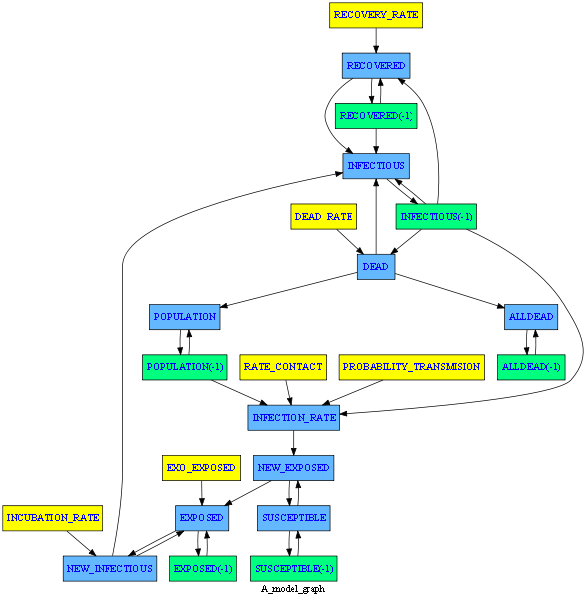

In [8]:
mcorona.drawmodel(lag=1,size=(2,2))